# 📓 Data Analytics Notebook — Ikarus Products

This notebook explores the furnished products dataset and prepares it for model training.

**Goals**
- Clean and standardize the data (especially `price` → USD float).
- Understand basic structure: missingness, distribution of prices, and the most frequent brands and categories.
- Produce a **cleaned CSV** that will be used consistently by the model-training pipeline.


## 1) Setup & Load

In [8]:
# Import required libraries
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Plot settings
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['axes.grid'] = True

# Define data path (absolute path)
DATA_PATH = Path(r"D:\DOWNLOADSS\ikarus_rec_app\backend\data\products.csv")

# Safety check
if not DATA_PATH.exists():
    raise FileNotFoundError(f"❌ File not found: {DATA_PATH}")

# Load dataset
df = pd.read_csv(DATA_PATH)

print(f"✅ Loaded dataset with {len(df)} rows and {df.shape[1]} columns")
df.head()



✅ Loaded dataset with 312 rows and 12 columns


,title,brand,description,price,categories,images,manufacturer,package_dimensions,country_of_origin,material,color,uniq_id
0,"GOYMFK 1pc Free Standing Shoe Rack, Multi-laye...",GOYMFK,"multiple shoes, coats, hats, and other items E...",$24.99,"['Home & Kitchen', 'Storage & Organization', '...",['https://m.media-amazon.com/images/I/416WaLx1...,GOYMFK,"2.36""D x 7.87""W x 21.6""H",China,Metal,White,02593e81-5c09-5069-8516-b0b29f439ded
1,"subrtex Leather ding Room, Dining Chairs Set o...",subrtex,subrtex Dining chairs Set of 2,NaN,"['Home & Kitchen', 'Furniture', 'Dining Room F...",['https://m.media-amazon.com/images/I/31SejUEW...,Subrtex Houseware INC,"18.5""D x 16""W x 35""H",NaN,Sponge,Black,5938d217-b8c5-5d3e-b1cf-e28e340f292e
2,Plant Repotting Mat MUYETOL Waterproof Transpl...,MUYETOL,NaN,$5.98,"['Patio, Lawn & Garden', 'Outdoor Décor', 'Doo...",['https://m.media-amazon.com/images/I/41RgefVq...,MUYETOL,"26.8""L x 26.8""W",NaN,Polyethylene,Green,b2ede786-3f51-5a45-9a5b-bcf856958cd8
3,"Pickleball Doormat, Welcome Doormat Absorbent ...",VEWETOL,The decorative doormat features a subtle textu...,$13.99,"['Patio, Lawn & Garden', 'Outdoor Décor', 'Doo...",['https://m.media-amazon.com/images/I/61vz1Igl...,Contrence,"24""L x 16""W",NaN,Rubber,A5589,8fd9377b-cfa6-5f10-835c-6b8eca2816b5
4,JOIN IRON Foldable TV Trays for Eating Set of ...,JOIN IRON Store,Set of Four Folding Trays With Matching Storag...,$89.99,"['Home & Kitchen', 'Furniture', 'Game & Recrea...",['https://m.media-amazon.com/images/I/41p4d4VJ...,NaN,"18.9""D x 14.2""W x 26""H",NaN,Iron,Grey Set of 4,bdc9aa30-9439-50dc-8e89-213ea211d66a


## 2) Lightweight Cleaning

- Fill text fields that will later feed the embedding model.
- Normalize `price` to a **USD float** value and fill any missing prices with the median (stable and robust).

In [16]:
# Fill text fields that might be missing
for col in ['title', 'brand', 'description', 'categories', 'material', 'color']:
    if col not in df.columns:
        df[col] = ''
    df[col] = df[col].fillna('')

# Clean and normalize price to float (USD)
if 'price' in df.columns:
    df['price'] = df['price'].astype(str).str.replace(r"[^\d\.]", "", regex=True)
    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    
    if df['price'].notna().any():
        df['price'] = df['price'].fillna(df['price'].median())
    else:
        df['price'] = 0.0

df.head()


,title,brand,description,price,categories,images,manufacturer,package_dimensions,country_of_origin,material,color,uniq_id
0,"GOYMFK 1pc Free Standing Shoe Rack, Multi-laye...",GOYMFK,"multiple shoes, coats, hats, and other items E...",24.99,"['Home & Kitchen', 'Storage & Organization', '...",['https://m.media-amazon.com/images/I/416WaLx1...,GOYMFK,"2.36""D x 7.87""W x 21.6""H",China,Metal,White,02593e81-5c09-5069-8516-b0b29f439ded
1,"subrtex Leather ding Room, Dining Chairs Set o...",subrtex,subrtex Dining chairs Set of 2,53.99,"['Home & Kitchen', 'Furniture', 'Dining Room F...",['https://m.media-amazon.com/images/I/31SejUEW...,Subrtex Houseware INC,"18.5""D x 16""W x 35""H",NaN,Sponge,Black,5938d217-b8c5-5d3e-b1cf-e28e340f292e
2,Plant Repotting Mat MUYETOL Waterproof Transpl...,MUYETOL,,5.98,"['Patio, Lawn & Garden', 'Outdoor Décor', 'Doo...",['https://m.media-amazon.com/images/I/41RgefVq...,MUYETOL,"26.8""L x 26.8""W",NaN,Polyethylene,Green,b2ede786-3f51-5a45-9a5b-bcf856958cd8
3,"Pickleball Doormat, Welcome Doormat Absorbent ...",VEWETOL,The decorative doormat features a subtle textu...,13.99,"['Patio, Lawn & Garden', 'Outdoor Décor', 'Doo...",['https://m.media-amazon.com/images/I/61vz1Igl...,Contrence,"24""L x 16""W",NaN,Rubber,A5589,8fd9377b-cfa6-5f10-835c-6b8eca2816b5
4,JOIN IRON Foldable TV Trays for Eating Set of ...,JOIN IRON Store,Set of Four Folding Trays With Matching Storag...,89.99,"['Home & Kitchen', 'Furniture', 'Game & Recrea...",['https://m.media-amazon.com/images/I/41p4d4VJ...,NaN,"18.9""D x 14.2""W x 26""H",NaN,Iron,Grey Set of 4,bdc9aa30-9439-50dc-8e89-213ea211d66a


## 3) Missingness Overview

In [17]:
# Count missing values per column
missing = df.isna().sum().sort_values(ascending=False)
missing


country_of_origin     187
manufacturer          107
package_dimensions      6
title                   0
price                   0
description             0
brand                   0
images                  0
categories              0
material                0
color                   0
uniq_id                 0
dtype: int64

## 4) Price Distribution

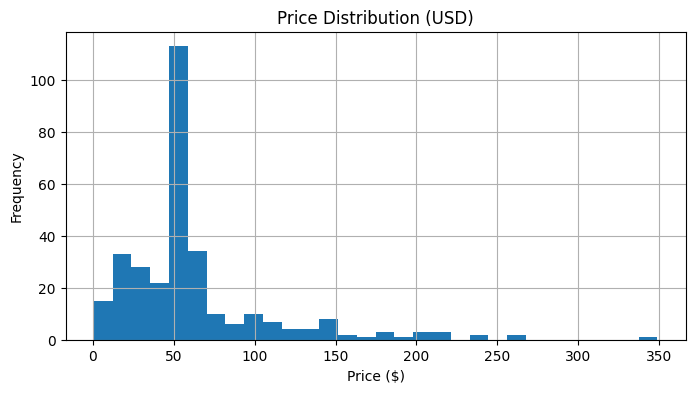

count    312.00
mean      63.39
std       48.49
min        0.60
25%       37.12
50%       53.99
75%       67.68
max      349.00
Name: price, dtype: float64

In [18]:
# Plot distribution of prices
ax = df['price'].plot(kind='hist', bins=30, title='Price Distribution (USD)')
ax.set_xlabel("Price ($)")
plt.show()

# Summary statistics
df['price'].describe().round(2)


## 5) Top Brands

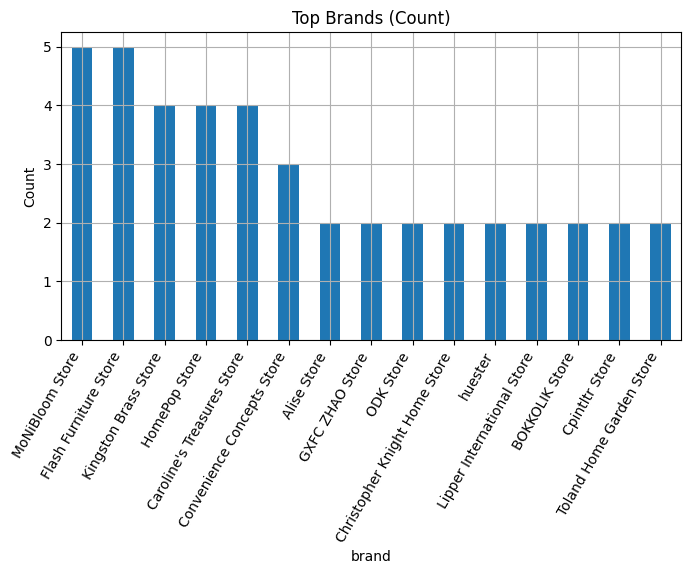

brand
MoNiBloom Store                  5
Flash Furniture Store            5
Kingston Brass Store             4
HomePop Store                    4
Caroline's Treasures Store       4
Convenience Concepts Store       3
Alise Store                      2
GXFC ZHAO Store                  2
ODK Store                        2
Christopher Knight Home Store    2
huester                          2
Lipper International Store       2
BOKKOLIK Store                   2
Cpintltr Store                   2
Toland Home Garden Store         2
Name: count, dtype: int64

In [19]:
# Count most common brands
top_brands = df['brand'].value_counts().head(15)

# Plot top brands
ax = top_brands.plot(kind='bar', title='Top Brands (Count)')
ax.set_ylabel("Count")
plt.xticks(rotation=60, ha='right')
plt.show()

top_brands


## 6) Top Categories (readable labels)

The `categories` column often looks like a list-as-string. We'll prettify it and also compute average prices by category.

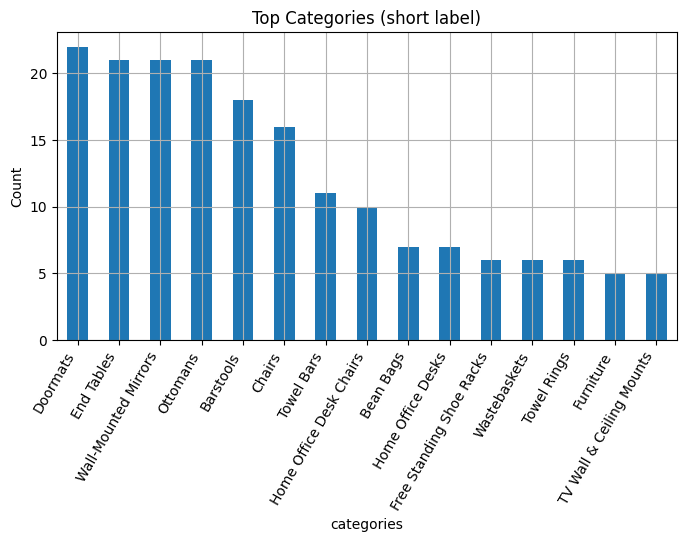

categories
Doormats                    22
End Tables                  21
Wall-Mounted Mirrors        21
Ottomans                    21
Barstools                   18
Chairs                      16
Towel Bars                  11
Home Office Desk Chairs     10
Bean Bags                    7
Home Office Desks            7
Free Standing Shoe Racks     6
Wastebaskets                 6
Towel Rings                  6
Furniture                    5
TV Wall & Ceiling Mounts     5
Name: count, dtype: int64

In [20]:
# Helper function for pretty category names
def pretty_category(s: str, keep_last=True) -> str:
    if not isinstance(s, str):
        return ''
    s = s.strip().strip('[]').replace("'", "")
    parts = [p.strip() for p in s.split(',') if p.strip()]
    if not parts:
        return ''
    return parts[-1] if keep_last else ', '.join(parts)

# Shorten categories
cats_short = df['categories'].map(lambda x: pretty_category(x, keep_last=True))
top_cats = cats_short.value_counts().head(15)

# Plot top categories
ax = top_cats.plot(kind='bar', title='Top Categories (short label)')
ax.set_ylabel("Count")
plt.xticks(rotation=60, ha='right')
plt.show()

top_cats


## 7) Average Price by Category & Brand

In [21]:
# Average price by category
avg_price_by_cat = (
    df.assign(cat_short=cats_short)
      .groupby('cat_short')['price'].mean()
      .sort_values(ascending=False)
      .head(15)
      .round(2)
)

# Average price by brand
avg_price_by_brand = (
    df.groupby('brand')['price'].mean()
      .sort_values(ascending=False)
      .head(15)
      .round(2)
)

pd.concat([
    avg_price_by_cat.to_frame('avg_price_usd'),
    avg_price_by_brand.to_frame('avg_price_usd')
], axis=1)


,avg_price_usd,avg_price_usd
Wine Cabinets,349.00,NaN
Bedside Cribs,259.99,NaN
Chests & Dressers,199.00,NaN
Managerial & Executive Chairs,189.99,NaN
Adirondack Chairs,159.99,NaN
Sofas,139.48,NaN
Computer Gaming Chairs,116.50,NaN
Bar & Serving Carts,115.00,NaN
Tables,105.10,NaN
Video Game Chairs,102.32,NaN


## 8) Export the Cleaned CSV

We save a **single source of truth** for training and serving.

In [23]:
# 8) Export the Cleaned CSV (absolute path + safe dir creation)

from pathlib import Path

# set absolute path to your backend/data folder
CLEAN_PATH = Path(r"D:\DOWNLOADSS\ikarus_rec_app\backend\data\products_clean.csv")

# make sure the parent folder exists
CLEAN_PATH.parent.mkdir(parents=True, exist_ok=True)

# save
df.to_csv(CLEAN_PATH, index=False, encoding="utf-8")

print(f"✅ Cleaned CSV saved at: {CLEAN_PATH}")
print("Exists:", CLEAN_PATH.exists())


✅ Cleaned CSV saved at: D:\DOWNLOADSS\ikarus_rec_app\backend\data\products_clean.csv
Exists: True
